In [2]:
%matplotlib notebook 
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

nsamp=10000
dT_LGM = np.random.normal(loc=-5.0,scale=1.0,size=nsamp)
dF_LGM = np.random.normal(loc=-8.8,scale=2.0,size=nsamp)
F2x=3.7

Bayesian forward model: 
$$\Delta T_{synth} = S_{hist} \frac{(\Delta F - \Delta N)}{F_{2\times CO_2}} + e$$ 
Here, $e$ is the uncertainty in observed temperature.

In [3]:
def plot_gaussian(S):
    Tav=np.average(dT_LGM)
    epsilon=dT_LGM/Tav
   
    dTsynth=S*dF_LGM/F2x+epsilon
    plt.hist(dTsynth,100,density=True,label="T_synth")
    plt.axvline(Tav,label="Reconstructed dT",c="r",lw=3)
    plt.legend()

<IPython.core.display.Javascript object>


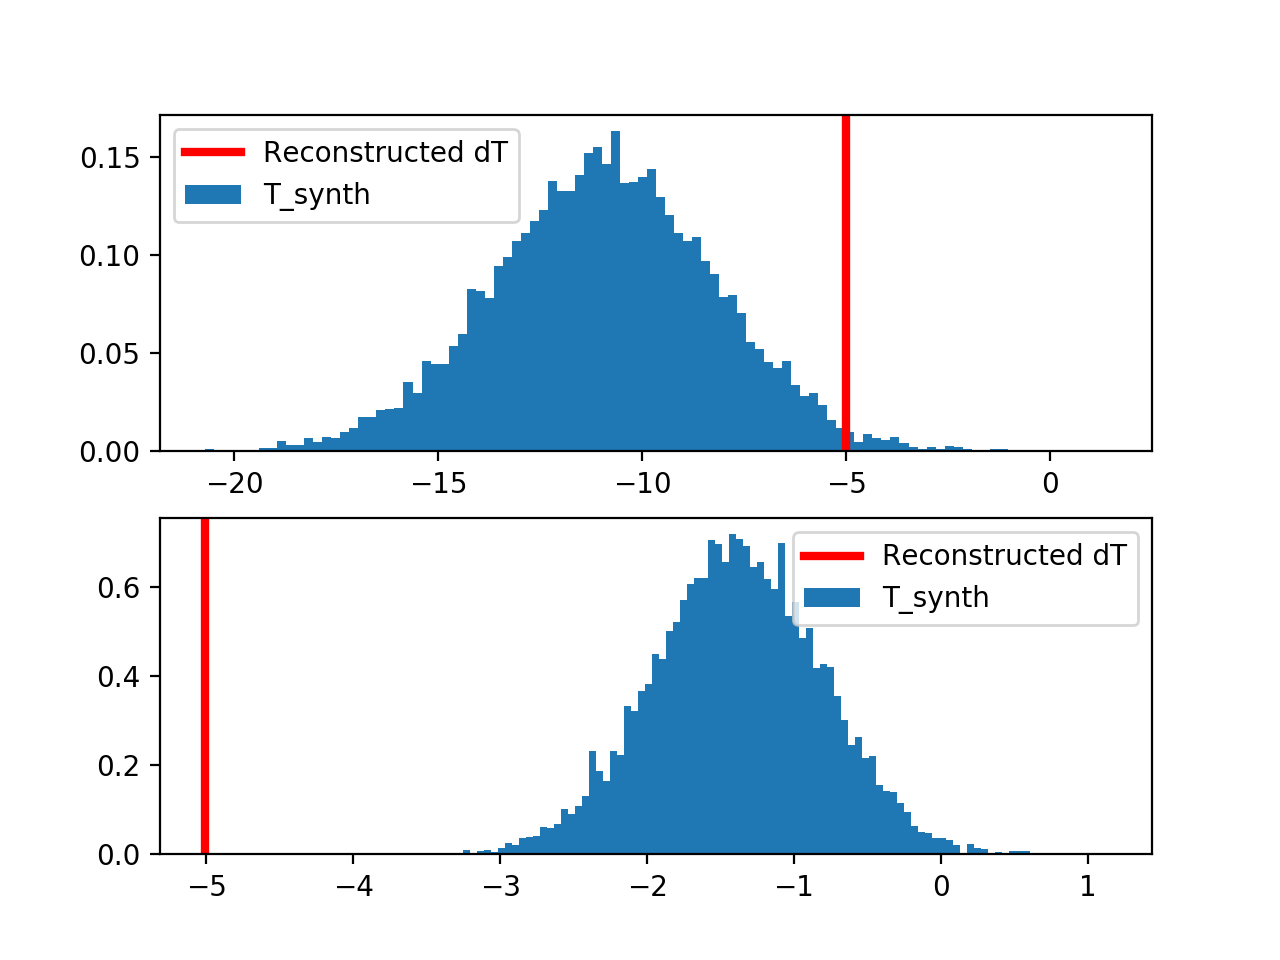

In [4]:
plt.figure()
plt.subplot(211)
plot_gaussian(5)
plt.subplot(212)
plot_gaussian(1)

In [6]:
def webb_likelihood(S_possibilities):
    Tav=np.average(dT_LGM)
    epsilon=dT_LGM/Tav
    likelihood_webb=[]
    for S in S_possibilities:
        dTsynth=S*dF_LGM/F2x+epsilon
        kde_webb = stats.gaussian_kde(dTsynth) 
        likelihood_webb+=[float(kde_webb(Tav))]
    return likelihood_webb/np.max(likelihood_webb)

<IPython.core.display.Javascript object>


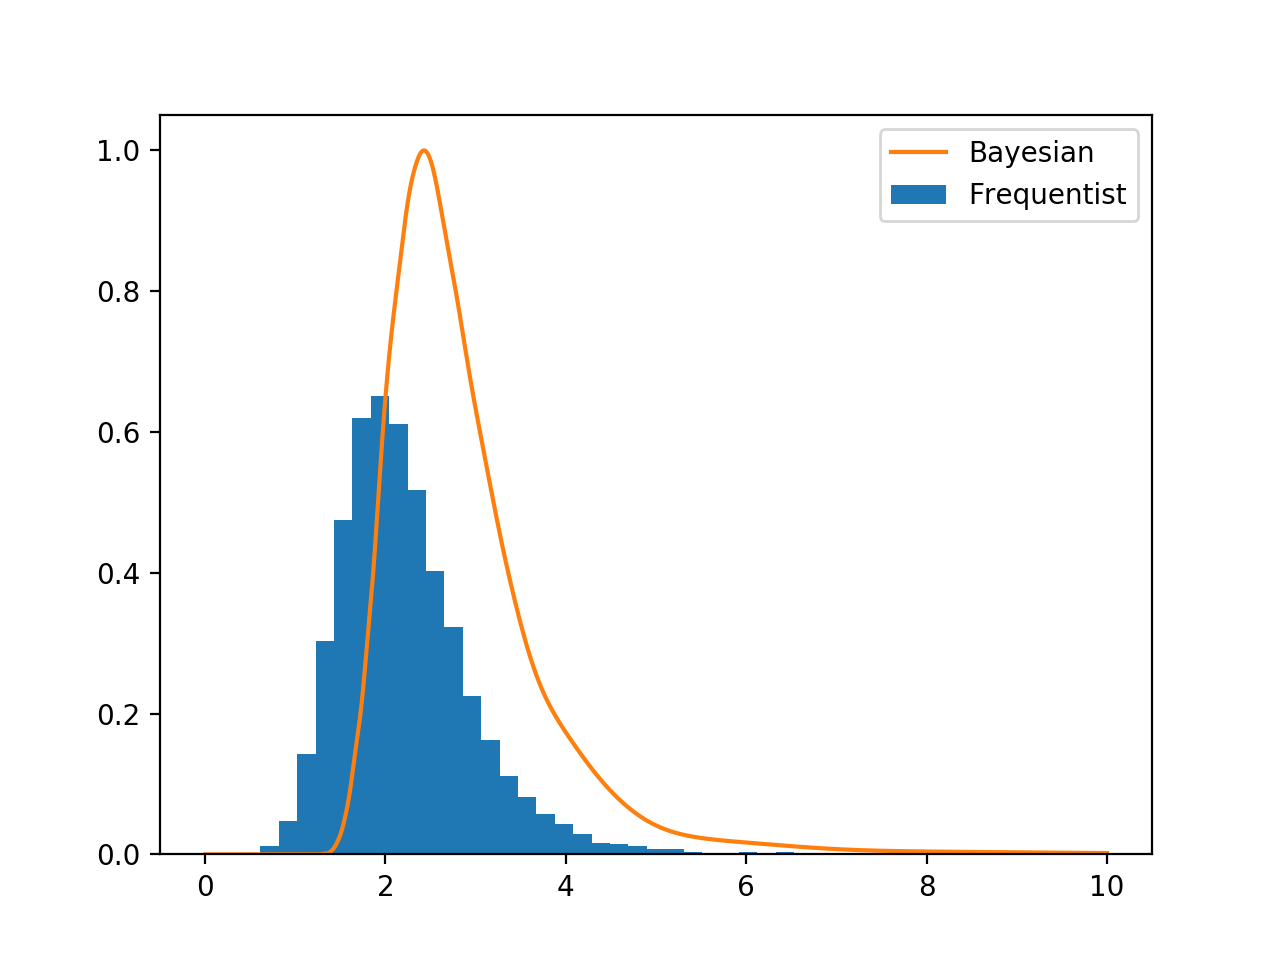

In [7]:
plt.figure()
Freq=3.7*dT_LGM/dF_LGM
tmp=plt.hist(Freq,bins=np.linspace(0,10),density=True,label="Frequentist")
plt.plot(np.linspace(0,10,nsamp),webb_likelihood(np.linspace(0,10,nsamp)),label="Bayesian")
#plt.plot(np.linspace(0,20,nsamp/10),webb_likelihood(np.linspace(0,20,nsamp/10)),label="Bayesian 2")
plt.legend()
